In [51]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sb
import folium
from datetime import datetime

# chained assignment warning disable

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# The purpose of this project is to do predict price of the listing in Amsterdam Airbnb data

In [3]:
# Data source link

# http://insideairbnb.com/get-the-data.html

# Dataset used:

# listings_summary.csv

In [4]:
# Importing datasets

listings = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/Airbnb/Summary files/listing_summary.csv")

In [5]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210


In [6]:
# Shape of the dataset

listings.shape

(19362, 16)

In [7]:
# EDA for this data has already been conducted

In [8]:
# Data Quality check

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19362 entries, 0 to 19361
Data columns (total 16 columns):
id                                19362 non-null int64
name                              19329 non-null object
host_id                           19362 non-null int64
host_name                         19358 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     19362 non-null object
latitude                          19362 non-null float64
longitude                         19362 non-null float64
room_type                         19362 non-null object
price                             19362 non-null int64
minimum_nights                    19362 non-null int64
number_of_reviews                 19362 non-null int64
last_review                       17078 non-null object
reviews_per_month                 17078 non-null float64
calculated_host_listings_count    19362 non-null int64
availability_365                  19362 non-null int64
dt

In [12]:
# Checking for and removing duplicates

listings.duplicated().sum()

# no duplicates for now. Code for removing duplicates is below

# listings.drop_duplicates(inplace=True)

0

In [13]:
# Checking for null values

listings.isnull().sum()

id                                    0
name                                 33
host_id                               0
host_name                             4
neighbourhood_group               19362
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2284
reviews_per_month                  2284
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Findings from null values

# 1. Both listings id and host id are well populated
# 2. neighbourhood group is completely missing
# 3. 2284 listings don't have reviews per month and last review date but the number of reviews is present

# Hence, we need to drop column beighbourhood group as it will not add anything to our prediction

In [14]:
listings.drop(['neighbourhood_group'], axis = 1, inplace = True)

In [15]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172
4,28871,Comfortable double room,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210


In [19]:
# Checking for and removing null values from the dataset

listings.isnull().sum()
listings.dropna(how="any", inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17051 entries, 0 to 19325
Data columns (total 15 columns):
id                                17051 non-null int64
name                              17051 non-null object
host_id                           17051 non-null int64
host_name                         17051 non-null object
neighbourhood                     17051 non-null object
latitude                          17051 non-null float64
longitude                         17051 non-null float64
room_type                         17051 non-null object
price                             17051 non-null int64
minimum_nights                    17051 non-null int64
number_of_reviews                 17051 non-null int64
last_review                       17051 non-null object
reviews_per_month                 17051 non-null float64
calculated_host_listings_count    17051 non-null int64
availability_365                  17051 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 2

In [21]:
# Lets have a look at at continuous variables for outliers

listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.705100e+04,1.705100e+04,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000
mean,1.877867e+07,5.902422e+07,52.365479,4.889630,157.941235,3.398569,28.712392,0.827290,1.766934,52.146678
std,1.153780e+07,7.472915e+07,0.016295,0.035641,160.206032,15.634377,57.213941,1.338302,3.543991,98.805956
min,2.818000e+03,3.159000e+03,52.289270,4.755940,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,9.186128e+06,8.705938e+06,52.355315,4.863970,99.000000,2.000000,4.000000,0.190000,1.000000,0.000000
50%,1.811818e+07,2.542221e+07,52.364810,4.887110,130.000000,2.000000,11.000000,0.430000,1.000000,0.000000
75%,2.734779e+07,7.776211e+07,52.375310,4.909345,180.000000,3.000000,27.000000,0.860000,1.000000,55.000000
max,4.307654e+07,3.428820e+08,52.425120,5.027690,9000.000000,1001.000000,850.000000,58.510000,39.000000,365.000000


In [28]:
# From our eda we know that there are certainly some outliers. So adding condition for those

listings2=listings[listings["price"]<=1000]
listings3=listings2[listings2["minimum_nights"]<=365]
listings3.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.703100e+04,1.703100e+04,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000,17031.000000
mean,1.878205e+07,5.901303e+07,52.365473,4.889631,155.047971,3.169103,28.701192,0.827481,1.766132,52.000352
std,1.153509e+07,7.470012e+07,0.016294,0.035657,95.135070,6.889647,57.169680,1.338711,3.543468,98.619200
min,2.818000e+03,3.159000e+03,52.289270,4.755940,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,9.192888e+06,8.715166e+06,52.355310,4.863945,99.000000,2.000000,4.000000,0.190000,1.000000,0.000000
50%,1.812072e+07,2.542564e+07,52.364810,4.887100,130.000000,2.000000,11.000000,0.430000,1.000000,0.000000
75%,2.733326e+07,7.774420e+07,52.375305,4.909355,180.000000,3.000000,27.000000,0.860000,1.000000,55.000000
max,4.307654e+07,3.428820e+08,52.425120,5.027690,1000.000000,300.000000,850.000000,58.510000,39.000000,365.000000


In [29]:
listings3.shape

(17031, 15)

In [37]:
# Adding some binning

pbins = pd.qcut(listings3['price'], q=[0,0.4,0.6,0.9,0.98,1])
pbins.value_counts()

(-0.001, 120.0]    7395
(150.0, 250.0]     4399
(120.0, 150.0]     3657
(250.0, 425.0]     1247
(425.0, 1000.0]     333
Name: price, dtype: int64

In [32]:
# Lets also bin availability and see what we get

abins = pd.cut(listings3['availability_365'], bins = 4)
abins.value_counts()

(-0.365, 91.25]    13677
(91.25, 182.5]      1363
(273.75, 365.0]     1260
(182.5, 273.75]      731
Name: availability_365, dtype: int64

In [65]:
calc_lis = listings3.groupby(by="host_id").agg({'id':'count'}).reset_index()
calc_lis['id']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       2
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       3
29       2
        ..
15116    2
15117    1
15118    1
15119    1
15120    1
15121    1
15122    2
15123    1
15124    1
15125    1
15126    1
15127    1
15128    1
15129    1
15130    1
15131    1
15132    1
15133    1
15134    1
15135    1
15136    1
15137    1
15138    1
15139    1
15140    1
15141    1
15142    1
15143    1
15144    1
15145    1
Name: id, Length: 15146, dtype: int64

In [53]:
listings3['price_bins']=pbins

In [54]:
listings3['aval_bins']=abins

In [55]:
listings3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17031 entries, 0 to 19325
Data columns (total 17 columns):
id                                17031 non-null int64
name                              17031 non-null object
host_id                           17031 non-null int64
host_name                         17031 non-null object
neighbourhood                     17031 non-null object
latitude                          17031 non-null float64
longitude                         17031 non-null float64
room_type                         17031 non-null object
price                             17031 non-null int64
minimum_nights                    17031 non-null int64
number_of_reviews                 17031 non-null int64
last_review                       17031 non-null object
reviews_per_month                 17031 non-null float64
calculated_host_listings_count    17031 non-null int64
availability_365                  17031 non-null int64
price_bins                        17031 non-null catego

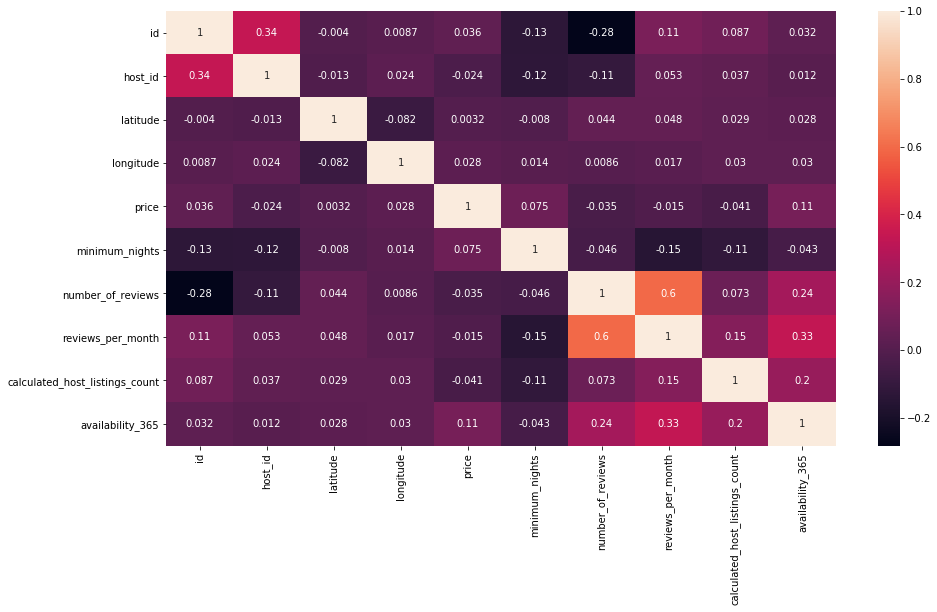

In [58]:
# Building a correlation plot

corr = listings3.corr(method="kendall")
plt.figure(figsize=(15,8))
sb.heatmap(corr, annot=True);

In [59]:
# It seems that there is no correlation among any variables

In [66]:
# Lets drop some columns which will not be useful for us in modeling

listings3.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis = 1, inplace = True)

In [67]:
listings3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17031 entries, 0 to 19325
Data columns (total 10 columns):
neighbourhood                     17031 non-null object
room_type                         17031 non-null object
price                             17031 non-null int64
minimum_nights                    17031 non-null int64
number_of_reviews                 17031 non-null int64
reviews_per_month                 17031 non-null float64
calculated_host_listings_count    17031 non-null int64
availability_365                  17031 non-null int64
price_bins                        17031 non-null category
aval_bins                         17031 non-null category
dtypes: category(2), float64(1), int64(5), object(2)
memory usage: 1.8+ MB


In [68]:
# Encoding categorical variables

def encoding(listings3):
    for column in listings3.columns[listings3.columns.isin(['neighbourhood', 'room_type', 'price_bins', 'aval_bins'])]:
        listings3[column]=listings3[column].factorize()[0]
    return listings3

listings3_en = encoding(listings3)

In [69]:
listings3.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_bins,aval_bins
0,0,0,59,3,278,2.06,1,169,0,0
1,1,0,100,1,340,2.76,2,106,0,0
2,2,1,125,14,5,0.18,1,132,1,0
3,2,0,155,2,217,2.15,1,172,2,0
4,2,0,75,2,332,2.82,3,210,0,1


In [71]:
listings3['neighbourhood'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [78]:
# Defining dependent and independent and then splitting into training and testing

x = listings3_en.iloc[:,[0,1,2,3,4,5,6,7,9]]
y = listings3_en.iloc[:,8]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=123)

In [80]:
x_train.head(10)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,aval_bins
16592,2,1,339,3,2,0.25,7,323,3
2831,1,1,160,2,2,0.06,1,0,2
15412,4,1,290,2,7,0.49,1,33,2
323,7,1,214,2,16,0.17,1,0,2
11504,13,1,99,2,13,0.47,1,0,2
7174,1,1,130,2,58,1.28,2,35,2
12699,3,1,150,2,16,0.71,1,0,2
21,1,0,86,1,179,1.60,1,0,2
6645,15,1,175,1,2,0.09,2,0,2
1183,7,1,109,3,14,0.19,1,0,2


In [81]:
y_train.head()

16592    3
2831     2
15412    3
323      2
11504    0
Name: price_bins, dtype: int64

In [83]:
# Building a linear regression model

reg = LinearRegression() # initializing
reg.fit(x_train, y_train) # fitting

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
y_pred=reg.predict(x_test) # predicting
y_pred[0:10]

array([0.41265398, 0.40840079, 1.83474672, 1.25220581, 0.4132689 ,
       0.45152629, 0.82114581, 1.23834517, 1.11958198, 1.00691022])

In [89]:
r2_score(y_test, y_pred)

0.7364667164164351

In [90]:
# Its a good r2 score. Hence, linear regression works well here

In [101]:
# Building a decision tree regressor

DTree = DecisionTreeRegressor(min_samples_leaf=0.0001) # initializing
DTree.fit(x_train, y_train) # fitting

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.0001,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [102]:
y_pred_d = DTree.predict(x_test) # predicting
y_pred_d[0:10]

array([0., 0., 2., 2., 0., 0., 1., 2., 2., 1.])

In [100]:
r2_score(y_test, y_pred_d)

1.0

In [ ]:
# r2 score is 1, clearly the model is overfitted